<a href="https://colab.research.google.com/github/sunnybb13/DNLP-project/blob/main/notebooks/01_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# install dependencies
!pip install -q transformers datasets scikit-learn accelerate

In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset

In [5]:
# load the BESSTIE dataset from huggingface
from datasets import load_dataset

ds = load_dataset("unswnlporg/BESSTIE")
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'variety', 'source', 'task'],
        num_rows: 17760
    })
    validation: Dataset({
        features: ['text', 'label', 'variety', 'source', 'task'],
        num_rows: 2428
    })
})

In [9]:
# Convert the HF dataset splits into Pandas DataFrames
train_df = ds["train"].to_pandas()
val_df   = ds["validation"].to_pandas()

# no test set :(

train_df.head()

,text,label,variety,source,task
0,This was one of the best dishes I've EVER had!...,1,en-AU,Google,Sentiment
1,This Mexican restaurant in Penrith is a great ...,1,en-AU,Google,Sentiment
2,"This was not to bad, I ordered the big pork ri...",1,en-AU,Google,Sentiment
3,Clean cool and a nice smaller casino to check ...,1,en-AU,Google,Sentiment
4,Well set out. Great areas to enjoy. Good food ...,1,en-AU,Google,Sentiment


Let's explore!

Samples per English variety:
variety
en-IN    6666
en-UK    5676
en-AU    5418
Name: count, dtype: int64


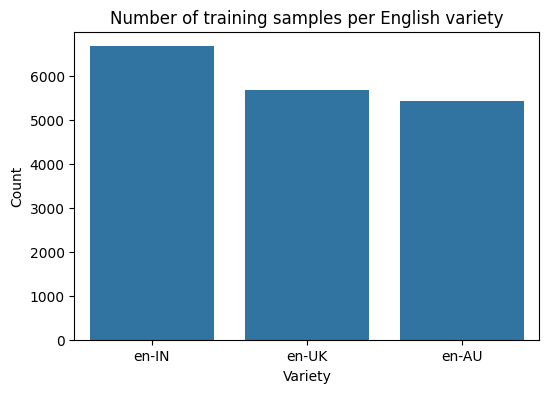

In [11]:
# Count how many samples each English variety contains (train split)
variety_counts = train_df['variety'].value_counts()

print("Samples per English variety:")
print(variety_counts)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=variety_counts.index, y=variety_counts.values)
plt.title("Number of training samples per English variety")
plt.xlabel("Variety")
plt.ylabel("Count")
plt.show()

Sentiment distribution (train set):
label
0    4473
1    4393
Name: count, dtype: int64


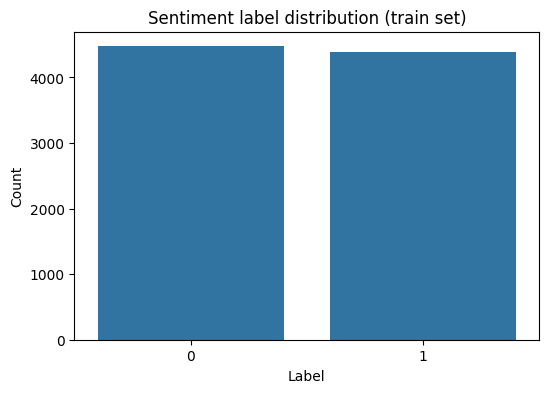

In [14]:
# Filter only the sentiment samples
sentiment_df = train_df[train_df["task"] == "Sentiment"]

# Count sentiment labels (0 = negative, 1 = positive)
sent_counts = sentiment_df["label"].value_counts()

print("Sentiment distribution (train set):")
print(sent_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=sent_counts.index.astype(str), y=sent_counts.values)
plt.title("Sentiment label distribution (train set)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Sarcasm distribution (train set):
label
0    7619
1    1275
Name: count, dtype: int64


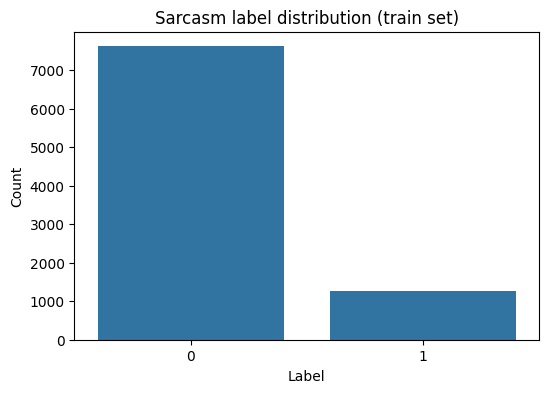

In [15]:
# Filter only the sarcasm samples
sarcasm_df = train_df[train_df["task"] == "Sarcasm"]

# Count sarcasm labels (0 = non-sarcastic, 1 = sarcastic)
sarc_counts = sarcasm_df["label"].value_counts()

print("Sarcasm distribution (train set):")
print(sarc_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=sarc_counts.index.astype(str), y=sarc_counts.values)
plt.title("Sarcasm label distribution (train set)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Average text length per variety:
variety
en-AU    56.408822
en-IN    35.094059
en-UK    59.964940
Name: text_length, dtype: float64


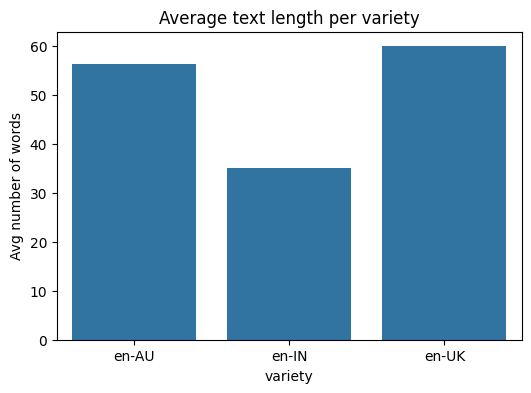

In [16]:
train_df["text_length"] = train_df["text"].apply(lambda x: len(x.split()))

avg_len_variety = train_df.groupby("variety")["text_length"].mean()

print("Average text length per variety:")
print(avg_len_variety)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_len_variety.index, y=avg_len_variety.values)
plt.title("Average text length per variety")
plt.ylabel("Avg number of words")
plt.show()

In [18]:
import numpy as np

# Function to safely sample an example if it exists
def safe_sample(df, variety, task, label):
    """
    Return one example matching (variety, task, label).
    If no example exists, return None.
    """
    subset = df[(df["variety"] == variety) &
                (df["task"] == task) &
                (df["label"] == label)]

    if len(subset) == 0:
        return None

    return subset.sample(1).iloc[0]


varieties = ["en-AU", "en-IN", "en-UK"]
tasks = ["Sentiment", "Sarcasm"]
labels = [0, 1]

for variety in varieties:
    print(f"\n==================== {variety} ====================\n")

    for task in tasks:
        print(f"--- {task} ---")

        for label in labels:
            example = safe_sample(train_df, variety, task, label)

            print(f"\nLabel = {label}")

            if example is None:
                print("No example available for this combination.")
            else:
                print("Text:", example['text'])
                print("Source:", example['source'])


==================== en-AU ====================

--- Sentiment ---

Label = 0
Text: A couple friends work in hospitality and I have to agree with the sentiment that casual workers seem easily exploited. 
But when did you get here? It wasn't always an employer's market. Pre-covid, at least in hospitality, casual workers could leave bad work environments because they had a lot more options. Post-covid there are fewer customers, rosters are thin, and venues closing down means workers are competing for fewer jobs, and they stick around even when mistreated.
A lot of casual work is taken up by visa holders like yourself, who don't have a safety net and tend to be even more exploitable, so I'm not sure it's Australian workers who are tolerant.
I think the real question is why are exploitative employers hard to hold accountable? There's Fair Work but they seem to only go after big corporations. In Victoria, Tasmania and Queensland, there's JobWatch, but they've had funding massively cut last

  variety       task  count
0   en-AU    Sarcasm   2709
1   en-AU  Sentiment   2709
2   en-IN    Sarcasm   3333
3   en-IN  Sentiment   3333
4   en-UK    Sarcasm   2852
5   en-UK  Sentiment   2824


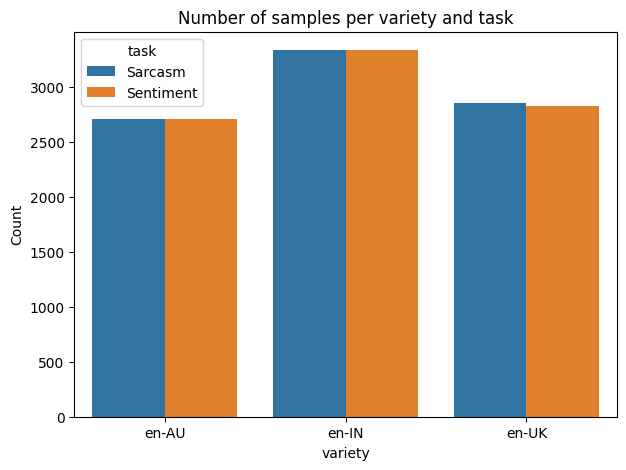

In [19]:
# Task distribution per variety
task_var_counts = train_df.groupby(["variety", "task"]).size().reset_index(name="count")

print(task_var_counts)

plt.figure(figsize=(7,5))
sns.barplot(data=task_var_counts, x="variety", y="count", hue="task")
plt.title("Number of samples per variety and task")
plt.ylabel("Count")
plt.show()

   variety       task  label  count
0    en-AU    Sarcasm      0   1899
1    en-AU    Sarcasm      1    810
2    en-AU  Sentiment      0   1451
3    en-AU  Sentiment      1   1258
4    en-IN    Sarcasm      0   3097
5    en-IN    Sarcasm      1    236
6    en-IN  Sentiment      0   1672
7    en-IN  Sentiment      1   1661
8    en-UK    Sarcasm      0   2623
9    en-UK    Sarcasm      1    229
10   en-UK  Sentiment      0   1350
11   en-UK  Sentiment      1   1474


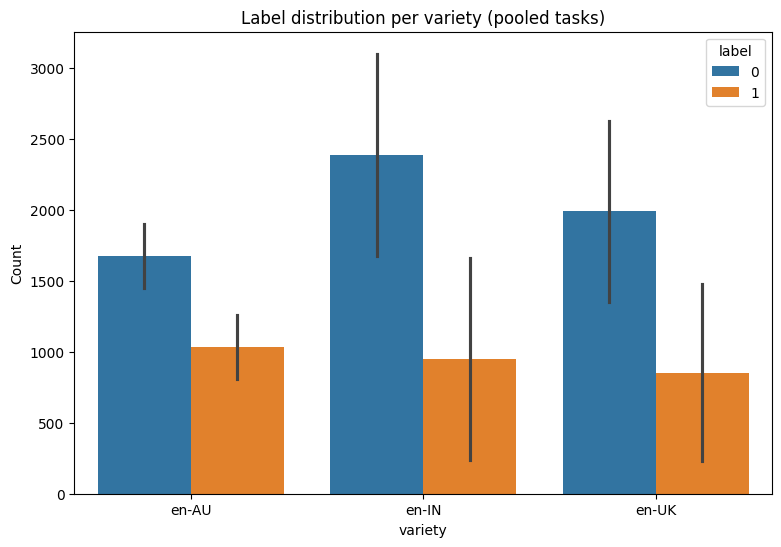

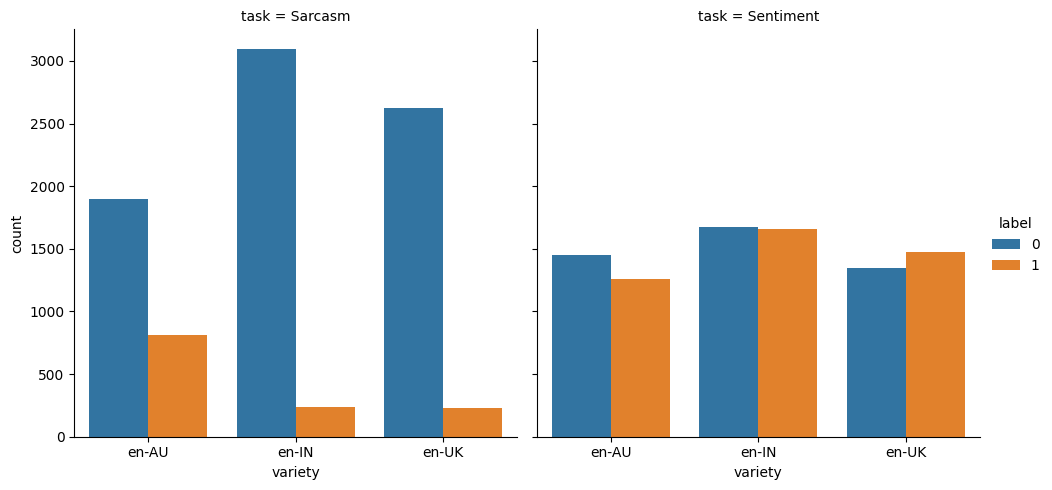

In [21]:
# Count labels grouped by variety and task
label_dist = train_df.groupby(["variety", "task", "label"]).size().reset_index(name="count")

print(label_dist)

plt.figure(figsize=(9,6))
sns.barplot(data=label_dist, x="variety", y="count", hue="label")
plt.title("Label distribution per variety (pooled tasks)")
plt.ylabel("Count")
plt.show()

sns.catplot(data=label_dist, x="variety", y="count",
            hue="label", col="task", kind="bar")


  variety       task  text_length
0   en-AU    Sarcasm    56.149133
1   en-AU  Sentiment    56.668512
2   en-IN    Sarcasm    34.870987
3   en-IN  Sentiment    35.317132
4   en-UK    Sarcasm    60.532609
5   en-UK  Sentiment    59.391643


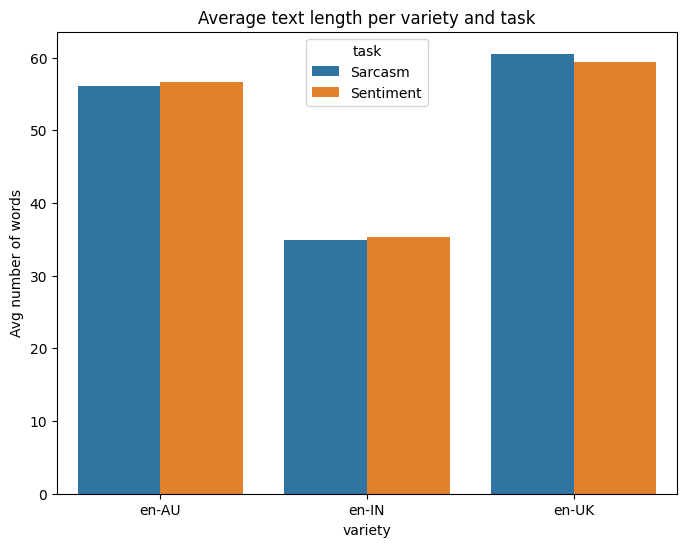

In [22]:
# Compute length if not done yet
train_df["text_length"] = train_df["text"].apply(lambda x: len(x.split()))

# Group
avg_length = train_df.groupby(["variety", "task"])["text_length"].mean().reset_index()

print(avg_length)

plt.figure(figsize=(8,6))
sns.barplot(data=avg_length, x="variety", y="text_length", hue="task")
plt.title("Average text length per variety and task")
plt.ylabel("Avg number of words")
plt.show()

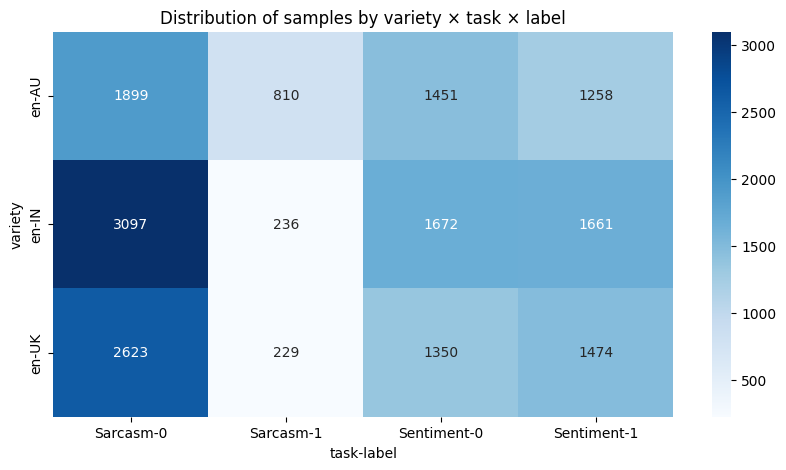

In [23]:
# Pivot into heatmap format
pivot = label_dist.pivot_table(index=["variety"], columns=["task", "label"], values="count").fillna(0)

plt.figure(figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Distribution of samples by variety × task × label")
plt.show()

In [31]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

import re

def tokenize_clean(text):
    """
    Clean and tokenize a text string:
    - lowercase
    - remove punctuation
    - split on whitespace
    - remove stopwords and very short tokens
    """
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", " ", text)  # keep only letters
    tokens = text.split()

    tokens = [
        tok for tok in tokens
        if tok not in STOPWORDS and len(tok) > 2
    ]
    return tokens
from collections import Counter

def top_words(df, N=20):
    all_words = []
    for txt in df["text"].tolist():
        all_words.extend(tokenize_clean(txt))

    counter = Counter(all_words)
    return counter.most_common(N)

sent0 = train_df[(train_df["task"] == "Sentiment") & (train_df["label"] == 0)]
sent1 = train_df[(train_df["task"] == "Sentiment") & (train_df["label"] == 1)]
sarc0 = train_df[(train_df["task"] == "Sarcasm") & (train_df["label"] == 0)]
sarc1 = train_df[(train_df["task"] == "Sarcasm") & (train_df["label"] == 1)]

tables = {
    "Sentiment_0": top_words(sent0, N=20),
    "Sentiment_1": top_words(sent1, N=20),
    "Sarcasm_0": top_words(sarc0, N=20),
    "Sarcasm_1": top_words(sarc1, N=20),
}

# Convert to DataFrames
result_tables = {
    name: pd.DataFrame(words, columns=["word", "count"])
    for name, words in tables.items()
}

result_tables

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'Sentiment_0':           word  count
 0         like    854
 1       people    840
 2         food    672
 3         good    663
 4          one    637
 5        would    632
 6          get    560
 7         time    498
 8         even    478
 9         also    442
 10     service    345
 11       staff    334
 12        much    320
 13      really    310
 14       think    305
 15       place    292
 16        back    291
 17       could    289
 18        need    286
 19  government    278,
 'Sentiment_1':           word  count
 0         good   2433
 1         food   1869
 2        place   1102
 3        great   1021
 4         nice    964
 5        staff    884
 6      service    856
 7         also    730
 8          one    631
 9     friendly    631
 10      really    607
 11        time    592
 12       would    590
 13        like    567
 14        well    541
 15     chicken    497
 16         get    458
 17  restaurant    453
 18         bit    445
 19        best    439,
 '

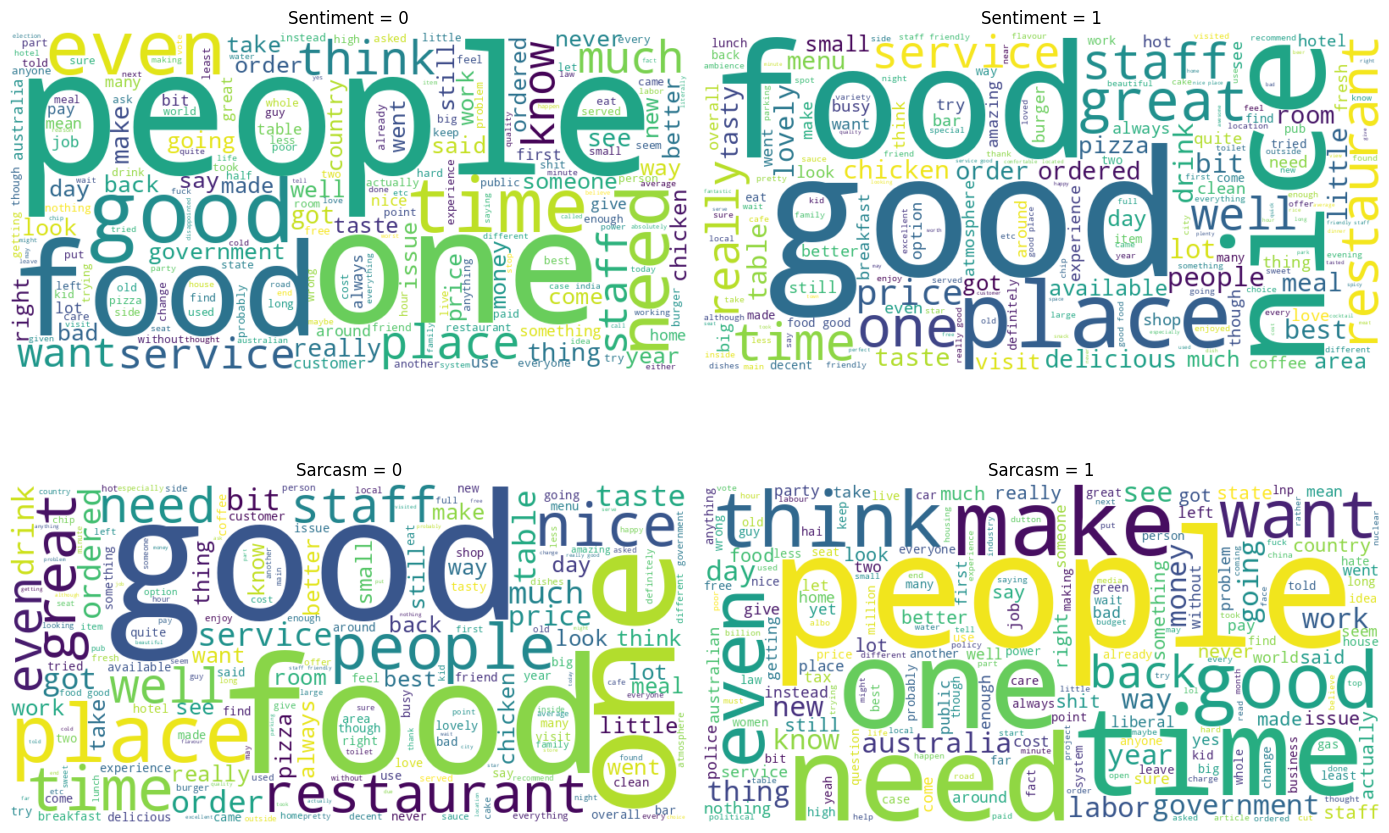

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def build_wordcloud(df, title):
    """
    Build a wordcloud using our cleaned tokens.
    """
    # Join cleaned tokens into a single string
    all_tokens = []
    for txt in df["text"].tolist():
        all_tokens.extend(tokenize_clean(txt))

    text_all = " ".join(all_tokens)

    wc = WordCloud(width=800, height=400, background_color="white").generate(text_all)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)

# Filter datasets
sent0 = train_df[(train_df["task"] == "Sentiment") & (train_df["label"] == 0)]
sent1 = train_df[(train_df["task"] == "Sentiment") & (train_df["label"] == 1)]
sarc0 = train_df[(train_df["task"] == "Sarcasm") & (train_df["label"] == 0)]
sarc1 = train_df[(train_df["task"] == "Sarcasm") & (train_df["label"] == 1)]

# Plot them
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
build_wordcloud(sent0, "Sentiment = 0")

plt.subplot(2, 2, 2)
build_wordcloud(sent1, "Sentiment = 1")

plt.subplot(2, 2, 3)
build_wordcloud(sarc0, "Sarcasm = 0")

plt.subplot(2, 2, 4)
build_wordcloud(sarc1, "Sarcasm = 1")

plt.tight_layout()
plt.show()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

# Make sure we have the 4 subsets
sent0 = train_df[(train_df["task"] == "Sentiment") & (train_df["label"] == 0)]
sent1 = train_df[(train_df["task"] == "Sentiment") & (train_df["label"] == 1)]
sarc0 = train_df[(train_df["task"] == "Sarcasm") & (train_df["label"] == 0)]
sarc1 = train_df[(train_df["task"] == "Sarcasm") & (train_df["label"] == 1)]

def join_clean_text(df):
    """
    Join all cleaned tokens from a DataFrame of texts
    into a single string for TF-IDF.
    """
    all_tokens = []
    for txt in df["text"].tolist():
        all_tokens.extend(tokenize_clean(txt))
    return " ".join(all_tokens)

# Build one "document" per category
docs = [
    join_clean_text(sent0),
    join_clean_text(sent1),
    join_clean_text(sarc0),
    join_clean_text(sarc1),
]

categories = ["Sentiment_0", "Sentiment_1", "Sarcasm_0", "Sarcasm_1"]

# Compute TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)  # shape: (4, vocab_size)
feature_names = vectorizer.get_feature_names_out()

def top_tfidf_for_category(X, feature_names, category_idx, top_k=20):
    """
    Return a DataFrame with the top-k TF-IDF words for a given row/category.
    """
    row = X[category_idx].toarray().flatten()
    top_indices = np.argsort(row)[::-1][:top_k]
    words = feature_names[top_indices]
    scores = row[top_indices]
    return pd.DataFrame({"word": words, "tfidf": scores})

tfidf_tables = {}
for i, cat in enumerate(categories):
    tfidf_tables[cat] = top_tfidf_for_category(X, feature_names, i, top_k=20)

tfidf_tables

{'Sentiment_0':           word     tfidf
 0         like  0.265751
 1       people  0.261394
 2         food  0.209115
 3         good  0.206315
 4          one  0.198224
 5        would  0.196668
 6          get  0.174263
 7         time  0.154970
 8         even  0.148746
 9         also  0.137543
 10     service  0.107358
 11       staff  0.103935
 12        much  0.099579
 13      really  0.096467
 14       think  0.094911
 15       place  0.090866
 16        back  0.090554
 17       could  0.089932
 18        need  0.088999
 19  government  0.086509,
 'Sentiment_1':           word     tfidf
 0         good  0.470037
 1         food  0.361077
 2        place  0.212898
 3        great  0.197250
 4         nice  0.186238
 5        staff  0.170782
 6      service  0.165373
 7         also  0.141031
 8          one  0.121904
 9     friendly  0.121904
 10      really  0.117268
 11        time  0.114370
 12       would  0.113984
 13        like  0.109540
 14        well  0.104517
 15    

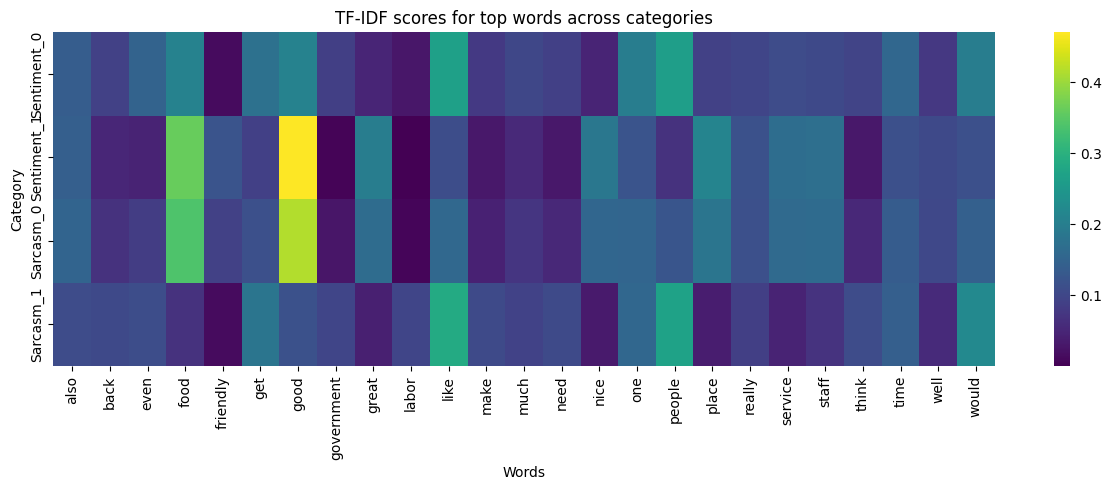

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

top_k = 15  # how many words to use per category for the heatmap

# Collect top-k words for each category
top_words_per_cat = {}
for i, cat in enumerate(categories):
    df_top = top_tfidf_for_category(X, feature_names, i, top_k=top_k)
    top_words_per_cat[cat] = df_top["word"].tolist()

# Union of all top words
all_top_words = sorted(list(set(
    word for words in top_words_per_cat.values() for word in words
)))

# Build a matrix: rows = categories, cols = words
heatmap_matrix = np.zeros((len(categories), len(all_top_words)))

for i, cat in enumerate(categories):
    row = X[i].toarray().flatten()
    for j, w in enumerate(all_top_words):
        idx = np.where(feature_names == w)[0]
        if len(idx) > 0:
            heatmap_matrix[i, j] = row[idx[0]]

# Create a DataFrame for seaborn
heatmap_df = pd.DataFrame(
    heatmap_matrix,
    index=categories,
    columns=all_top_words
)

plt.figure(figsize=(max(8, len(all_top_words) * 0.5), 5))
sns.heatmap(
    heatmap_df,
    annot=False,
    cmap="viridis"
)
plt.title("TF-IDF scores for top words across categories")
plt.xlabel("Words")
plt.ylabel("Category")
plt.tight_layout()
plt.show()